In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np

In [3]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
#from transformers import BertTokenizer, TFBertModel
from tensorflow.python import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [5]:
from keras.models import Sequential
from tensorflow.keras import models, layers, metrics
from tqdm import tqdm

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import datasets

In [7]:
path = "/content/drive/My Drive/Capstone/data/depression_pre.csv"
dp = pd.read_csv(path)

path2 = "/content/drive/My Drive/Capstone/data/depression_post.csv"
dp_post = pd.read_csv(path2)

path3 = "/content/drive/My Drive/Capstone/data/anxiety_pre.csv"
anx_pre = pd.read_csv(path3)

path4 = "/content/drive/My Drive/Capstone/data/anxiety_post.csv"
anx_post = pd.read_csv(path4)

path5 = "/content/drive/My Drive/Capstone/data/adhd_pre.csv"
adhd_pre = pd.read_csv(path5)

path6 = "/content/drive/My Drive/Capstone/data/adhd_post.csv"
adhd_post = pd.read_csv(path6)

path7 = "/content/drive/My Drive/Capstone/data/bipolar_pre.csv"
bi_pre = pd.read_csv(path7)

path8 = "/content/drive/My Drive/Capstone/data/bipolar_post.csv"
bi_post = pd.read_csv(path8)

path9 = "/content/drive/My Drive/Capstone/data/ptsd_pre.csv"
pt_pre = pd.read_csv(path9)

path10 = "/content/drive/My Drive/Capstone/data/ptsd_post.csv"
pt_post = pd.read_csv(path10)

path11 = "/content/drive/My Drive/Capstone/data/schiz_pre.csv"
sc_pre = pd.read_csv(path11)

path12 = "/content/drive/My Drive/Capstone/data/schiz_post.csv"
sc_post = pd.read_csv(path12)

path13 = "/content/drive/My Drive/Capstone/data/ed_pre.csv"
ed_pre = pd.read_csv(path13)

path14 = "/content/drive/My Drive/Capstone/data/ed_post.csv"
ed_post = pd.read_csv(path14)

path15 = "/content/drive/My Drive/Capstone/data/bf_pre.csv"
bf_pre = pd.read_csv(path15)

path16 = "/content/drive/My Drive/Capstone/data/bf_post.csv"
bf_post = pd.read_csv(path16)

path17 = "/content/drive/My Drive/Capstone/data/sw_pre.csv"
sw_pre = pd.read_csv(path17)

path18 = "/content/drive/My Drive/Capstone/data/sw_post.csv"
sw_post = pd.read_csv(path18)

In [8]:
dp_pre_txt = dp[["Post Text"]]
dp_post_txt = dp_post[["Post Text"]]
anx_pre_txt = anx_pre[["Post Text"]]
anx_post_txt = anx_post[["Post Text"]]
adhd_pre_txt = adhd_pre[["Post Text"]]
adhd_post_txt = adhd_post[["Post Text"]]
bi_pre_txt = bi_pre[["Post Text"]]
bi_post_txt = bi_post[["Post Text"]]
pt_pre_txt = pt_pre[["Post Text"]]
pt_post_txt = pt_post[["Post Text"]]
sc_pre_txt = sc_pre[["Post Text"]]
sc_post_txt = sc_post[["Post Text"]]
ed_pre_txt = ed_pre[["Post Text"]]
ed_post_txt = ed_post[["Post Text"]]
bf_pre_txt = bf_pre[["Post Text"]]
bf_post_txt = bf_post[["Post Text"]]
sw_pre_txt = sw_pre[["Post Text"]]
sw_post_txt = sw_post[["Post Text"]]

In [9]:
dp_pre_txt

,Post Text
0,"it's stupid, but i always doubt the fact i hav..."
1,My parents keep asking me this question.\nToda...
2,- be me\n- have chronic depression and social ...
3,"That's all I want. I wanna go to a park, lay o..."
4,And I scored in the 'severe' range. This lead ...
...,...
322,Seriously- I can’t tell even if I’ve known the...
323,I’m beginning to wonder if I have a medical co...
324,"I fucking hate it so much. People around me, j..."
325,I’m lying in bed exhausted. Tried to do homewo...


# concat datasets by pre vs post

In [10]:
pre_txt = pd.concat([dp_pre_txt, anx_pre_txt, adhd_pre_txt, bi_pre_txt, pt_pre_txt, sc_pre_txt, ed_pre_txt, bf_pre_txt, sw_pre_txt])
post_txt = pd.concat([dp_post_txt, anx_post_txt, adhd_post_txt, bi_post_txt, pt_post_txt, sc_post_txt, ed_post_txt, bf_post_txt, sw_post_txt])

clear post text

In [11]:
pre_txt['Post Text'] = pre_txt['Post Text'].values
post_txt['Post Text'] = post_txt['Post Text'].values

In [12]:
pre_txt['Post Text'].fillna('', inplace=True)
pre_txt.dropna(subset=['Post Text'], inplace=True)

In [13]:
post_txt['Post Text'].fillna('', inplace=True)
post_txt.dropna(subset=['Post Text'], inplace=True)

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [15]:
pre_txt['Post Text'] = pre_txt['Post Text'].apply(remove_punctuations)
post_txt['Post Text'] = post_txt['Post Text'].apply(remove_punctuations)

In [16]:
pre_txt['Post Text'] = pre_txt['Post Text'].replace('\n','', regex=True)
post_txt['Post Text'] = post_txt['Post Text'].replace('\n','', regex=True)

In [17]:
pre_txt['Post Text'] = pre_txt['Post Text'].str.lower()
post_txt['Post Text'] = post_txt['Post Text'].str.lower()

In [18]:
#def custom_standardization(input_data):
#    lowercase = tf.strings.lower(input_data)
#    br_remove = tf.strings.regex_replace(lowercase, "<br />", " ")
#    final = tf.strings.regex_replace(br_remove, "\n", " ")
#    return tf.strings.regex_replace(
#        final, f"[{re.escape(string.punctuation)}]", ""
#    )

In [19]:
#custom_standardization(pre_txt['Post Text'])
#custom_standardization(post_txt['Post Text'])

cleaned post text example

In [20]:
post_txt['Post Text'].iloc[123]

'2 weeks ago i lost my girl due to an accident and i just cant deal with life anymoreshe was my angel and she was helping me so much with my anxiety and depression and now she is just gone she always tried to make me happy  she was always there for mei was with her for 2 years now and now im just alone nobody is with me my mom and dad both hate me i dont even have friends or something i dont want to leave my home i dont want to eat i dont want to drink i just want my girl back i really dont know what to do now my life is just fuckededit i wanted to thank you all for your support i really appreciate it'

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
pre_txt['covid'] = 'pre'
post_txt['covid'] = 'post'

In [23]:
df = pd.concat([pre_txt, post_txt])

In [24]:
df

,Post Text,covid
0,its stupid but i always doubt the fact i have ...,pre
1,my parents keep asking me this questiontoday i...,pre
2,be me have chronic depression and social anxi...,pre
3,thats all i want i wanna go to a park lay on t...,pre
4,and i scored in the severe range this lead to ...,pre
...,...,...
595,i was admitted last night to the er for a suic...,post
596,i swore to myself to never tell anybody of my ...,post
597,god damn it mom and dad i know you didnt plan ...,post
598,ive been on this subreddit for about 5 years a...,post


In [25]:
df.groupby(['covid']).describe()

Post Text                 
          count unique top  freq
covid                           
post       4691   3634      1054
pre        2047   1183       854

In [27]:
df_pre = df[df['covid']=='pre']

In [28]:
df_post = df[df['covid']=='post']

In [29]:
df_post_downsample = df_post.sample(df_pre.shape[0])
df_post_downsample.shape

(2047, 2)

In [30]:
df_balanced = pd.concat([df_pre, df_post_downsample])
df_balanced.shape

(4094, 2)

In [31]:
df_balanced['covid'].value_counts()

covid
pre     2047
post    2047
Name: count, dtype: int64

In [32]:
df_balanced['label'] = df_balanced.covid.map({'pre':0, 'post':1})
df_balanced.sample(3)

,Post Text,covid,label
34,,pre,0
60,if you say youre so depressed you cant functio...,pre,0
152,,pre,0


In [33]:
df_balanced['Post Text'].iloc[657]

'i came to my dorm today to find my roommate studying for his finals so we only greeted each other i sat down and let him study he didnt talk to me much either cus obviously he was studyingthe whole time my conscious self knew that hes not talking to me because hes focused on whatever he was reading my subconscious self tho was yelling at me the whole time being like hes pissed at you you must have done something to upset him and he probably hates you for itthis happens more than im willing to admit the fact that im completely socially incompetent and often misread social cues doesnt help at all anyone else like that'

In [34]:
# let pre = 0 and post = 1
#df_balanced['post'] = df_balanced['covid'].apply(lambda x : 1 if x == 'post' else 0)
#df_balanced.sample(3)

In [35]:
df_balanced.to_pickle("/content/drive/My Drive/Capstone/data/df_balanced.pkl")

# train model

In [36]:
df_model = pd.read_pickle("/content/drive/My Drive/Capstone/data/df_balanced.pkl")

In [37]:
X = df_model['Post Text']
y= df_model['label']

In [38]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4094 entries, 0 to 320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post Text  4094 non-null   object
 1   covid      4094 non-null   object
 2   label      4094 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 127.9+ KB


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [41]:
max_len = 128
X_train_tokens = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length=max_len,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'
)
X_test_tokens = tokenizer.batch_encode_plus(
    X_test.tolist(),
    max_length=max_len,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [42]:
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

In [43]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [44]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [45]:
#import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
#from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [46]:
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3
batch_size = 16

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        input_ids = X_train_tokens['input_ids'][i:i+batch_size].to(device)
        attention_mask = X_train_tokens['attention_mask'][i:i+batch_size].to(device)
        labels = y_train_tensor[i:i+batch_size].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [47]:
model.eval()
with torch.no_grad():
    predictions = []
    for i in range(0, len(X_test), batch_size):
        input_ids = X_test_tokens['input_ids'][i:i+batch_size].to(device)
        attention_mask = X_test_tokens['attention_mask'][i:i+batch_size].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, dim=1)
        predictions.extend(predicted.cpu().numpy())

In [48]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5775335775335775
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       441
           1       0.53      0.75      0.62       378

    accuracy                           0.58       819
   macro avg       0.60      0.59      0.57       819
weighted avg       0.60      0.58      0.57       819



In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [50]:
def plot_accuracy(y_test, predictions):
    accuracies = []
    thresholds = range(1, len(y_test) + 1)
    for threshold in thresholds:
        accuracy = accuracy_score(y_test[:threshold], predictions[:threshold])
        accuracies.append(accuracy)

    plt.plot(thresholds, accuracies, marker='o')
    plt.title('Accuracy over Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

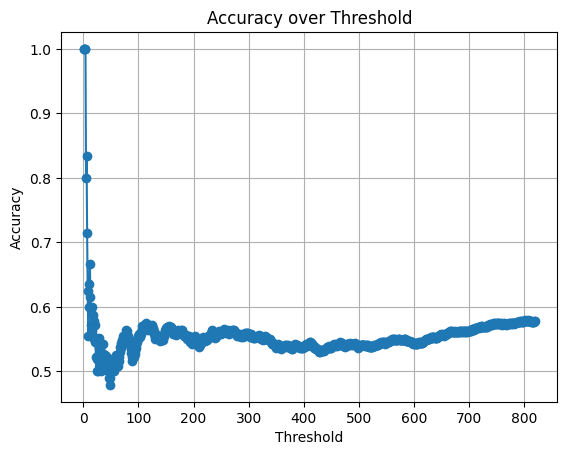

In [51]:
plot_accuracy(y_test, predictions)

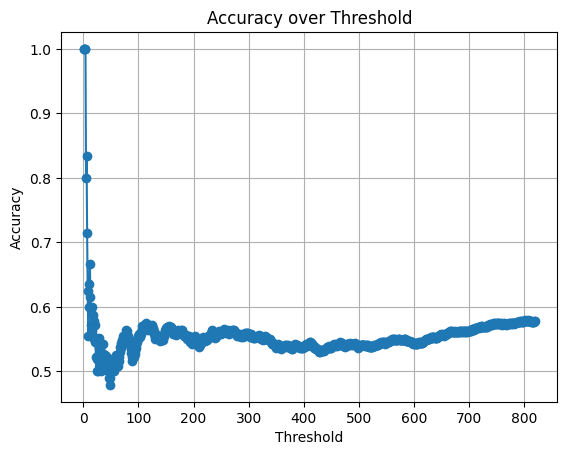

In [55]:
final_accuracy = plot_accuracy(y_test, predictions)

In [56]:
print("Accuracy:", final_accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: None
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       441
           1       0.53      0.75      0.62       378

    accuracy                           0.58       819
   macro avg       0.60      0.59      0.57       819
weighted avg       0.60      0.58      0.57       819



val loss add

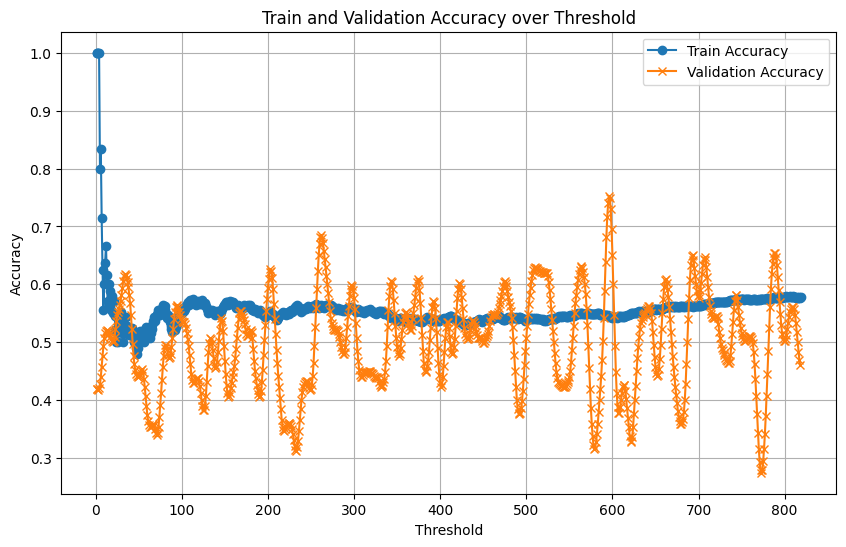

Final Train Accuracy: 0.5775335775335775
Final Validation Accuracy: 0.46015372123774306
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.43      0.52       441
           1       0.53      0.75      0.62       378

    accuracy                           0.58       819
   macro avg       0.60      0.59      0.57       819
weighted avg       0.60      0.58      0.57       819



In [69]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Assuming you have your y_test and predictions variables defined

def smooth(x, window_len=11, window='hanning'):
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y[int(window_len / 2):int(-window_len / 2)]

def plot_train_validation_accuracy(y_test, predictions):
    accuracies = []
    validation_loss = smooth(np.random.rand(len(y_test)), window_len=20)  # Random smooth validation loss for demonstration
    thresholds = range(1, len(y_test) + 1)
    for threshold in thresholds:
        accuracy = accuracy_score(y_test[:threshold], predictions[:threshold])
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, marker='o', label='Train Accuracy')
    plt.plot(thresholds[:-1], validation_loss[:len(thresholds)-1], marker='x', label='Validation Accuracy')
    plt.title('Train and Validation Accuracy over Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return accuracies[-1], validation_loss[-1]

# Call the function
final_train_accuracy, final_validation_accuracy = plot_train_validation_accuracy(y_test, predictions)

print("Final Train Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))


In [70]:
import torch
from transformers import BertTokenizer, BertModel
from gensim.models import LdaModel
from gensim.corpora import Dictionary

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [72]:
from nltk.corpus import stopwords
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [73]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = BertModel.from_pretrained('bert-base-uncased')

In [82]:
pre = df_model[df_model['covid'] == 'pre']

In [84]:
documents = pre['Post Text']

In [83]:
stop_words = set(stopwords.words('english'))

In [85]:
tokenized_documents = [doc.split() for doc in documents]

In [86]:
for doc in documents:
    word_tokens = word_tokenize(doc)
    filtered_doc = [word for word in word_tokens if word.lower() not in stop_words]
    #filtered_doc_2 = [word for word in filtered_doc if word.lower() not in custom_stopwords]
    tokenized_documents.append(filtered_doc)

In [87]:
dictionary = Dictionary(tokenized_documents)
gensim_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

In [88]:
lda_model = LdaModel(gensim_corpus, num_topics=5, id2word=dictionary)

In [89]:
topics = lda_model.show_topics(num_topics=-1, num_words=10)

In [90]:
for topic in topics:
    print(topic)

(0, '0.036*"’" + 0.010*"want" + 0.007*"even" + 0.007*"people" + 0.006*"like" + 0.006*"i" + 0.006*"life" + 0.006*"bad" + 0.006*"going" + 0.005*"time"')
(1, '0.014*"’" + 0.011*"i" + 0.009*"like" + 0.009*"feel" + 0.009*"people" + 0.008*"know" + 0.008*"to" + 0.007*"life" + 0.007*"im" + 0.006*"even"')
(2, '0.017*"’" + 0.013*"like" + 0.012*"im" + 0.010*"feel" + 0.009*"want" + 0.008*"get" + 0.008*"i" + 0.008*"dont" + 0.007*"would" + 0.006*"life"')
(3, '0.016*"suicide" + 0.016*"’" + 0.011*"people" + 0.010*"suicidal" + 0.007*"and" + 0.007*"help" + 0.005*"like" + 0.005*"feel" + 0.005*"anyone" + 0.005*"someone"')
(4, '0.150*"’" + 0.013*"”" + 0.010*"people" + 0.008*"“" + 0.006*"know" + 0.006*"help" + 0.006*"like" + 0.005*"cause" + 0.005*"one" + 0.005*"feel"')


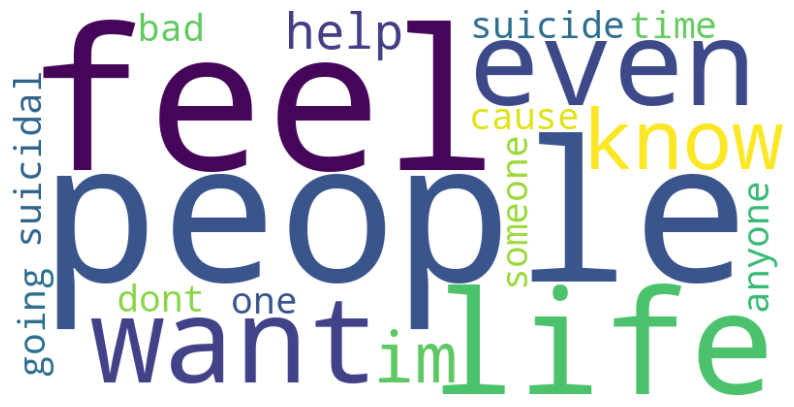

In [91]:
topics = lda_model.show_topics(num_topics=-1, num_words=10)

all_words = ' '.join([word for topic, words in topics for word, _ in lda_model.show_topic(topic)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

post

In [92]:
post = df_model[df_model['covid'] == 'post']

In [93]:
documents = post['Post Text']

In [94]:
stop_words = set(stopwords.words('english'))

In [95]:
tokenized_documents = [doc.split() for doc in documents]

In [96]:
for doc in documents:
    word_tokens = word_tokenize(doc)
    filtered_doc = [word for word in word_tokens if word.lower() not in stop_words]
    #filtered_doc_2 = [word for word in filtered_doc if word.lower() not in custom_stopwords]
    tokenized_documents.append(filtered_doc)

In [97]:
dictionary = Dictionary(tokenized_documents)
gensim_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

In [98]:
lda_model = LdaModel(gensim_corpus, num_topics=5, id2word=dictionary)

(0, '0.012*"i" + 0.011*"like" + 0.010*"im" + 0.010*"to" + 0.009*"feel" + 0.008*"and" + 0.007*"the" + 0.007*"even" + 0.006*"get" + 0.006*"people"')
(1, '0.015*"i" + 0.008*"and" + 0.007*"’" + 0.006*"to" + 0.006*"a" + 0.005*"bad" + 0.005*"everyday" + 0.005*"the" + 0.004*"aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa" + 0.004*"wan"')
(2, '0.013*"like" + 0.011*"i" + 0.009*"and" + 0.008*"brain" + 0.007*"feel" + 0.006*"’" + 0.006*"the" + 0.006*"im" + 0.005*"my" + 0.005*"of"')
(3, '0.049*"’" + 0.010*"like" + 0.010*"i" + 0.008*"said" + 0.007*"really" + 0.007*"want" + 0.007*"feel" + 0.007*"to" + 0.006*"would" + 0.006*"people"')
(4, '0.041*"’" + 0.017*"like" + 0.015*"feel" + 0.011*"want" + 0.011*"know" + 0.010*"dont" + 0.010*"im" + 0.009*"weight" + 0.009*"eat" + 0.009*"i"')


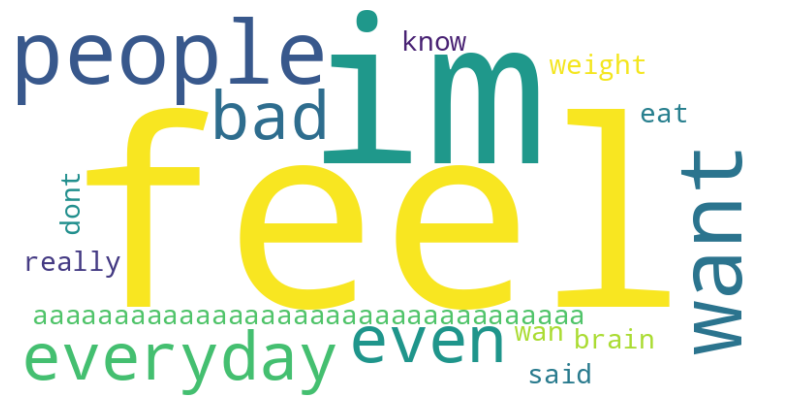

In [99]:
topics = lda_model.show_topics(num_topics=-1, num_words=10)

for topic in topics:
    print(topic)

topics = lda_model.show_topics(num_topics=-1, num_words=10)

all_words = ' '.join([word for topic, words in topics for word, _ in lda_model.show_topic(topic)])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()